# Determining the final parameters necessary for the systems (i.e. absolute magnitude and flux ratio)

This script, having cut down the sample to only include K and M dwarfs, works with the existing stellar parameters to determine the following:

* Absolute magnitude for the primary 
* Absolute magnitude for the secondary 
* Corrected apparent magnitude for the primary 
* Corrected apparent magnitude for the secondary 
* Flux ratio for the primary and secondary stars (secondary/primary)
* Primary flux 
* Secondary flux 
* Primary luminosity 
* Distance to system 

It then performs cuts in the flux ratio.

In [1]:
# Import Modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [2]:
# Open stellar sample and cut to the required secondary star parameters
sample = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/run_4/G_with_binaries_with_parameters_3.csv')

# M DWARFS
#rows = sample[(sample["sec_temp"] <= np.log10(4000)) & (sample["logAge"] >= 9) & (sample['M_H'] >= -1.0) & (sample['sec_mass'] <= 0.7)]

# M DWARFS AND K DWARFS
rows = sample[(sample["sec_temp"] <= np.log10(5100)) & (sample["logAge"] >= 9) & (sample['M_H'] >= -1.0) & (sample['sec_mass'] <= 0.7)]

print('There are ' + str(len(rows['logTe'])) + ' G/M binaries in this sample.')
rows.to_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/final_sample_gm_binaries.csv', index=False) # Save to a new CSV file

There are 21275 G/M binaries in this sample.


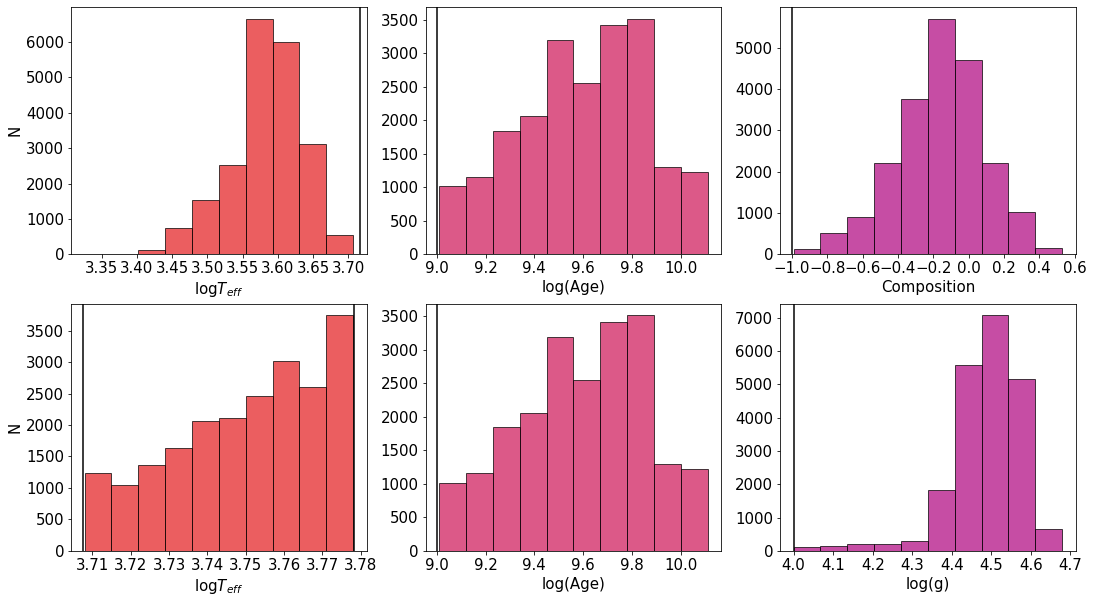

In [3]:
# Plot some parameters for the primary and secondary stars as a check
plt.figure(figsize=(18, 10))
plt.subplot(231)
plt.hist(rows['sec_temp'], color='#e31a1c', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(np.log10(5200), color='black')
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$\logT_{eff}$', fontsize=15)
plt.subplot(232)
plt.hist(rows['logAge'], color='#ce1256', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(9, color='black')
plt.xlabel('log(Age)', fontsize=15)
plt.subplot(233)
plt.hist(rows['M_H'], color='#ae017e', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(-1, color='black')
plt.xlabel('Composition', fontsize=15)

plt.subplot(234)
plt.hist(rows['logTe'], color='#e31a1c', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(np.log10(5100), color='black')
plt.axvline(np.log10(6000), color='black')
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$\logT_{eff}$', fontsize=15)
plt.subplot(235)
plt.hist(rows['logAge'], color='#ce1256', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(9, color='black')
plt.xlabel('log(Age)', fontsize=15)
plt.subplot(236)
plt.hist(rows['logg'], color='#ae017e', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(4, color='black')
plt.xlabel('log(g)', fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_m_dwarf_parameters_2.png')
plt.show()

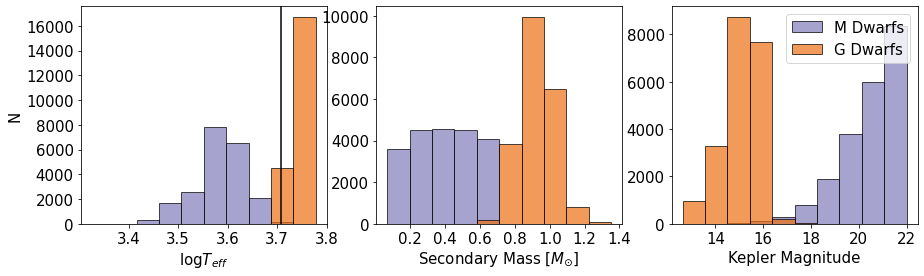

In [4]:
# Plot some histograms of primary and secondary parameters together
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.hist(rows['sec_temp'], range=(min(rows['sec_temp']), max(rows['logTe'])), color='#807dba', alpha=0.7, edgecolor='black', linestyle='-')
plt.hist(rows['logTe'], range=(min(rows['sec_temp']), max(rows['logTe'])), color='#ec7014', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(np.log10(5100), color='black')
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$\logT_{eff}$', fontsize=15)

plt.subplot(132)
plt.hist(rows['sec_mass'], range=(min(rows['sec_mass']), max(rows['Mact'])), color='#807dba', alpha=0.7, edgecolor='black', linestyle='-')
plt.hist(rows['Mact'], range=(min(rows['sec_mass']), max(rows['Mact'])), color='#ec7014', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'Secondary Mass [$M_{\odot}$]', fontsize=15)

plt.subplot(133)
plt.hist(rows['sec_mags'], range=(min(rows['sec_mags']), max(rows['sec_mags'])), bins=10, color='#807dba', alpha=0.7, edgecolor='black', linestyle='-', label='M Dwarfs')
plt.hist(rows['Kepler'], range=(min(rows['sec_mags']), max(rows['sec_mags'])), bins=10, color='#ec7014', alpha=0.7, edgecolor='black', linestyle='-', label='G Dwarfs')
plt.xticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Kepler Magnitude', fontsize=15)

plt.savefig('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_gm_dwarf_parameters.png')
plt.show()

In [5]:
# Determine parameters for the systems that we have not already

abs_pri_mags = []
abs_sec_mags = []
dist = []
p_flux = []
s_flux = []
flux_ratios = []
app_pri_mags_corrected = []
app_sec_mags_corrected = []

binaries = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/final_sample_gm_binaries.csv')

lum = binaries['logL'] # Primary luminosity
av = binaries['Av'] # Extinction (assuming both stars are subject to the same level of extinction)
dist_mod = binaries['m-M0'] # Distance modulus for the primary
sec_mass = binaries['sec_mass'] # Secondary mass
comp = binaries['M_H'] # Composition of both stars
mag = binaries['Kepler'] # Kepler magnitude of primary
sec_mag = binaries['sec_mags'] # Kepler magnitude of secondary 
pri_teff = binaries['logTe'] # Primary temperature 
sec_teff = binaries['sec_temp'] # Secondary temperature

for i in range(len(rows['logAge'])):
    
    distance_to_primary_parsec = (10**((dist_mod[i] + 5 - av[i])/5)) # parsecs
    distance_to_primary = distance_to_primary_parsec * 3.086e18 # centimeters
    dist.append(distance_to_primary)
    
    abs_mag_prim = mag[i] + 5 - av[i] - (5 * (np.log10(distance_to_primary_parsec)))
    abs_pri_mags.append(abs_mag_prim)

    abs_mag_sec = sec_mag[i] + 5 - av[i] - (5 * (np.log10(distance_to_primary_parsec)))
    abs_sec_mags.append(abs_mag_sec)

    primary_luminosity = (10**lum[i]) * 3.846e33 # ergs per second

    primary_flux = primary_luminosity / (4 * math.pi * (distance_to_primary)**2) # ergs/s/cm^2
    p_flux.append(primary_flux)

    app_mag_prim_corrected = abs_mag_prim - 5 + av[i] + (5 * np.log10(distance_to_primary_parsec))
    app_pri_mags_corrected.append(app_mag_prim_corrected)

    app_mag_sec_corrected = abs_mag_sec - 5 + av[i] + (5 * np.log10(distance_to_primary_parsec))
    app_sec_mags_corrected.append(app_mag_sec_corrected)
    
    flux_rat = 100**((app_mag_prim_corrected - app_mag_sec_corrected)/5) # Secondary/primary 
    flux_ratios.append(flux_rat)
    
    f_2 = flux_rat * primary_flux 
    s_flux.append(f_2)

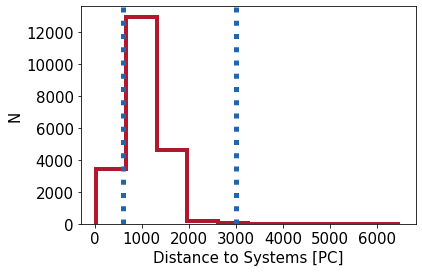

In [6]:
# Plot a histogram of the distances with lines of the minimum and maximum distances of general stars in the Kepler system
dist_in_pc = np.array(dist) / 3.086e18
plt.hist(dist_in_pc, histtype='step', color='#b2182b', linewidth=4)
plt.xlabel('Distance to Systems [PC]', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.axvline(600, color='#2166ac', linewidth=5, linestyle=':')
plt.axvline(3000, color='#2166ac', linewidth=5, linestyle=':')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_dist_hist.png')

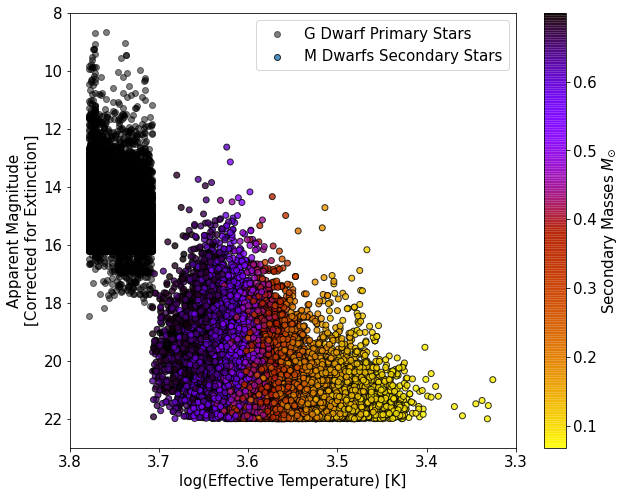

In [7]:
# Color temp plot of all of the stars in the sample
# Colors of the secondary stars correspond to the secondary masses
plt.figure(figsize=(10, 8))
plt.scatter(pri_teff, app_pri_mags_corrected, color='black', alpha=0.5, label='G Dwarf Primary Stars')
plt.scatter(sec_teff, app_sec_mags_corrected, c=sec_mass, cmap='gnuplot_r', edgecolor='black', alpha=0.8, label='M Dwarfs Secondary Stars')
cb = plt.colorbar()
cb.set_label(label=r'Secondary Masses $M_{\odot}$', fontsize=15)
cb.ax.tick_params(labelsize=15)
plt.xlim(3.8, 3.3)
plt.ylim(23, 8)
plt.legend(fontsize=15)
plt.xlabel('log(Effective Temperature) [K]', fontsize=15)
plt.ylabel('Apparent Magnitude\n[Corrected for Extinction]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_apparent_mag.png')
plt.show()

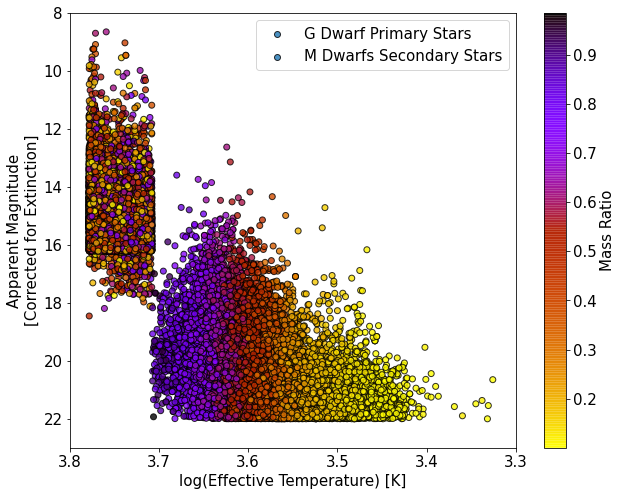

In [8]:
# Color temp plot of all of the stars in the sample
# Colors of the stars corresponds to their mass ratio
plt.figure(figsize=(10, 8))
plt.scatter(pri_teff, app_pri_mags_corrected, c=rows['mass_ratios'], cmap='gnuplot_r', edgecolor='black', alpha=0.8, label='G Dwarf Primary Stars')
plt.scatter(sec_teff, app_sec_mags_corrected, c=rows['mass_ratios'], cmap='gnuplot_r', edgecolor='black', alpha=0.8, label='M Dwarfs Secondary Stars')
cb = plt.colorbar()
plt.legend(fontsize=15)
cb.set_label(label=r'Mass Ratio', fontsize=15)
cb.ax.tick_params(labelsize=15)
plt.xlim(3.8, 3.3)
plt.ylim(23, 8)
plt.xlabel('log(Effective Temperature) [K]', fontsize=15)
plt.ylabel('Apparent Magnitude\n[Corrected for Extinction]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_apparent_mag_mr.png')
plt.show()

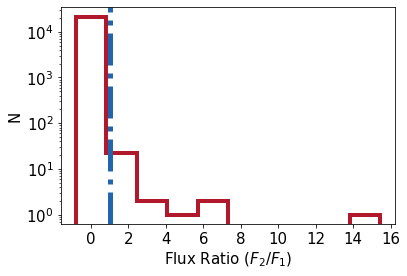

In [9]:
# Histogram of the flux ratio; blue line shows a flux ratio of 1. 
plt.hist(flux_ratios, histtype='step', color='#b2182b', linewidth=4, align='left')
plt.xlabel(r'Flux Ratio $(F_2/F_1)$', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.axvline(1, color='#2166ac', linewidth=5, linestyle='-.')
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_flux_rat.png')

In [10]:
# Saving this sample
full_sample_array = np.column_stack((binaries,abs_pri_mags,abs_sec_mags,dist,p_flux,flux_ratios,app_pri_mags_corrected,app_sec_mags_corrected,s_flux))
np.savetxt('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/final_sample_gm_binaries_flux_ratios.csv', full_sample_array, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,K,Mact,periods,mass_ratios,sec_mass,sec_temp,sec_comp,sec_mags,sec_logg,abs_pri,abs_sec,dist,p_flux,fr,correct_pri_app,correct_sec_app,s_flux')

In [11]:
# Cutting the sample so that all flux ratios are <= 1
sample = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/final_sample_gm_binaries_flux_ratios.csv')
rows = sample[(sample["fr"] <= 1)]
rows.to_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_4/final_sample_gm_binaries_flux2.csv', index=True, index_label='number') # Save to a new CSV file